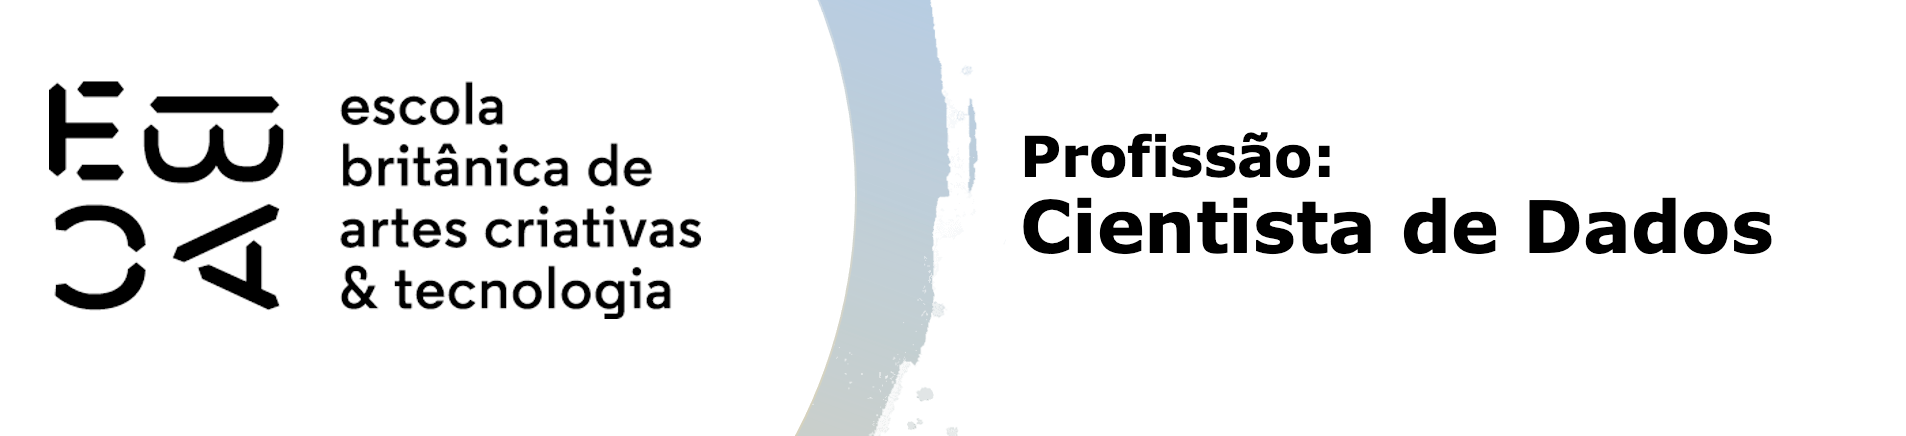

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [508]:
df = pd.read_csv('online_shoppers_intention.csv')

In [510]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [512]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [517]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [519]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [521]:
df = df.drop(columns=['Month', 'VisitorType'])

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [523]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
y = df['Revenue']
X = df.drop(columns='Revenue')

In [525]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)
y_train_cat = pd.Categorical(y_train)


X_pad = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_pad['y'] = y_train_cat

In [527]:
y_train.value_counts()

Revenue
False    7816
True     1431
Name: count, dtype: int64

In [529]:
X_pad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9247 entries, 0 to 9246
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           9247 non-null   float64 
 1   Administrative_Duration  9247 non-null   float64 
 2   Informational            9247 non-null   float64 
 3   Informational_Duration   9247 non-null   float64 
 4   ProductRelated           9247 non-null   float64 
 5   ProductRelated_Duration  9247 non-null   float64 
 6   BounceRates              9247 non-null   float64 
 7   ExitRates                9247 non-null   float64 
 8   PageValues               9247 non-null   float64 
 9   SpecialDay               9247 non-null   float64 
 10  OperatingSystems         9247 non-null   float64 
 11  Browser                  9247 non-null   float64 
 12  Region                   9247 non-null   float64 
 13  TrafficType              9247 non-null   float64 
 14  Weekend 

In [531]:
SQD = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pad[variaveis])
    SQD.append(km.inertia_)

In [533]:
SQD

[55482.00000000004,
 38670.34037864078,
 32584.664555406365,
 29234.86328443897,
 25919.428416682713,
 22902.269429538148,
 20311.3079070618,
 19200.53862516824,
 16886.303369940688,
 15828.15669535404,
 15070.626024713796,
 14224.950937577176,
 13591.73479009769,
 12992.124896262663]

<Axes: xlabel='num_clusters'>

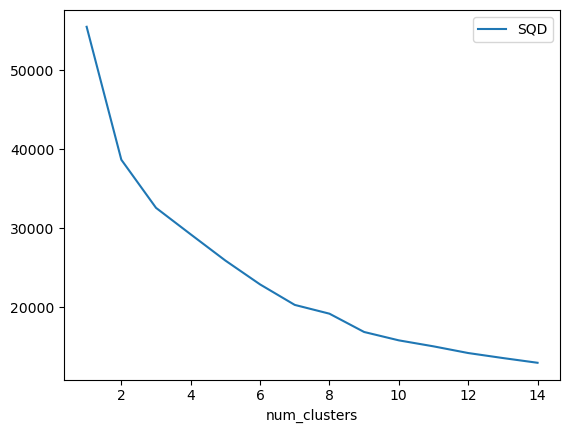

In [535]:
df_clust = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_clust.plot(x='num_clusters', y = 'SQD')

In [537]:
silhuetas = []
max_clusters = 10

X_numerico = X_pad[variaveis].select_dtypes(include=[float, int])

for n_clusters in range(2, max_clusters + 1):
    km = KMeans(n_clusters=n_clusters, random_state=42).fit(X_numerico)
    silhueta = silhouette_score(X_numerico, km.labels_)
    silhuetas.append(silhueta)
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    X_pad['grupos_' + str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)


<Axes: xlabel='n_clusters'>

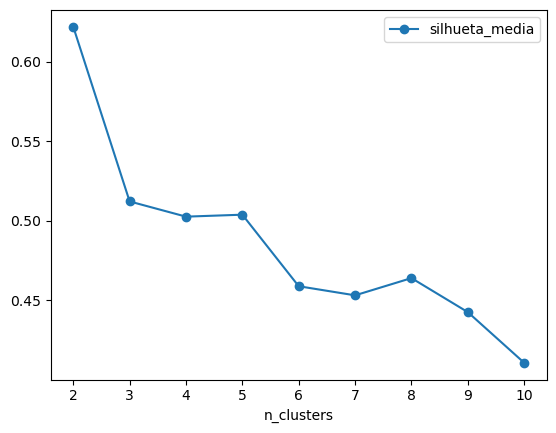

In [538]:
df_silhuetas = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_media': silhuetas})

df_silhuetas.plot.line(x='n_clusters', y='silhueta_media', marker='o')

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

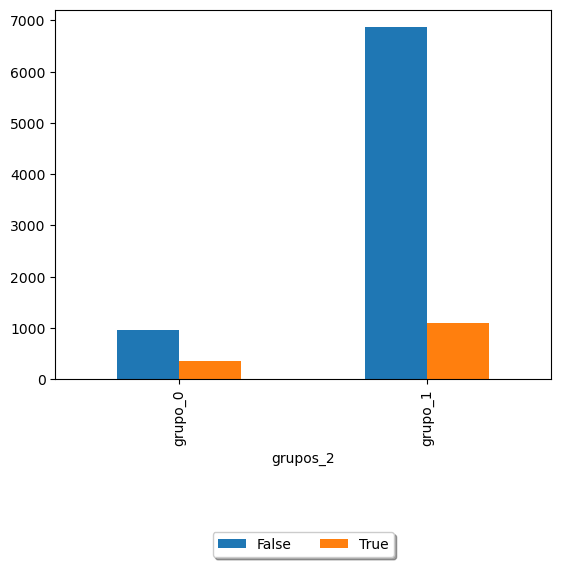

In [558]:
ax = X_pad.groupby(['grupos_2', 'y'])['y'].count().unstack().plot.bar()
ax.legend(loc='lower center', bbox_to_anchor=(0.5,-.5), ncol=3, fancybox=True, shadow=True)

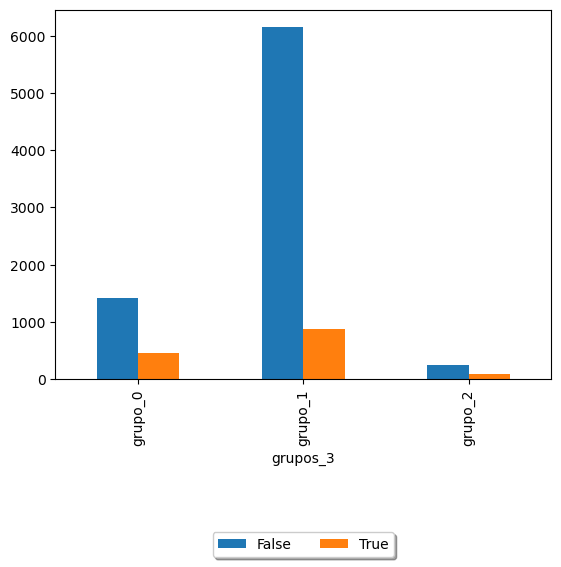

In [544]:
ax = X_pad.groupby(['grupos_3', 'y'])['y'].count().unstack().plot.bar()
ax.legend(loc='lower center', bbox_to_anchor=(0.5,-.5), ncol=3, fancybox=True, shadow=True)

In [560]:
pd.crosstab(X_pad['y'], X_pad['grupos_2'])

grupos_2,grupo_0,grupo_1
y,,
False,949,6867
True,345,1086


In [548]:
pd.crosstab(X_pad['y'], X_pad['grupos_3'])

grupos_3,grupo_0,grupo_1,grupo_2
y,,,
False,1414,6148,254
True,453,881,97


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Segundo as avaliações feitas na questão anterior o grupo mais propenso à compra é o grupo 1